In [1]:
from fvhoe.array_management import HydroState
from fvhoe.hydro import compute_primitives, compute_conservatives
from fvhoe.fv import interpolate_cell_centers, interpolate_fv_averages
import matplotlib.pyplot as plt
import numpy as np

_hs = HydroState(ndim=1)
gamma = 1.4

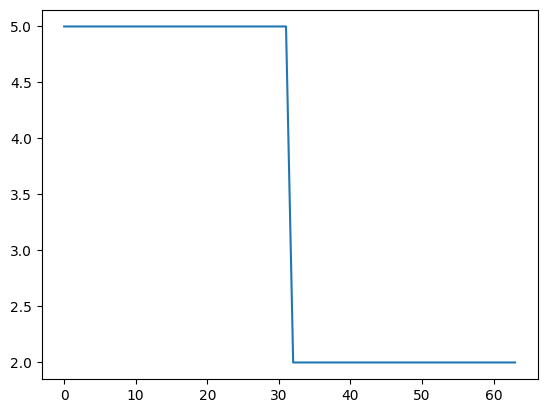

In [6]:
x = np.linspace(0, 1, 64).reshape(-1, 1, 1)
u_fv = np.empty((5, *x.shape))
u_fv[_hs("rho")] = np.where(x < 0.5, 1.0, 1.5)
u_fv[_hs("E")] = np.where(x < 0.5, 5, 2)
u_fv[_hs("mx")] = np.where(x < 0.5, 1, 2)
u_fv[_hs("my")] = 0
u_fv[_hs("mz")] = 0

plt.plot(u_fv[_hs("E")].flatten())

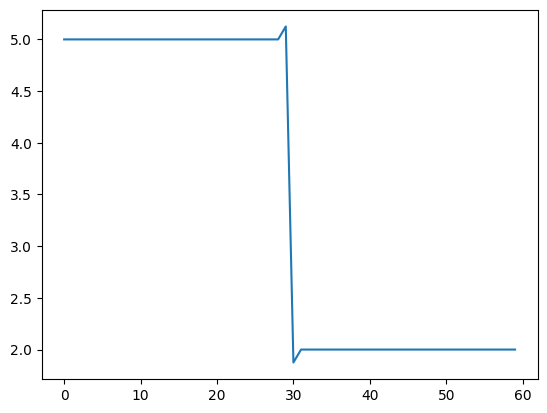

In [7]:
u_cc = interpolate_cell_centers(u_fv, p=(3, 0, 0))
plt.plot(u_cc[_hs("E")].flatten())

(array([[0.26666667]]), array([[1.8]]))

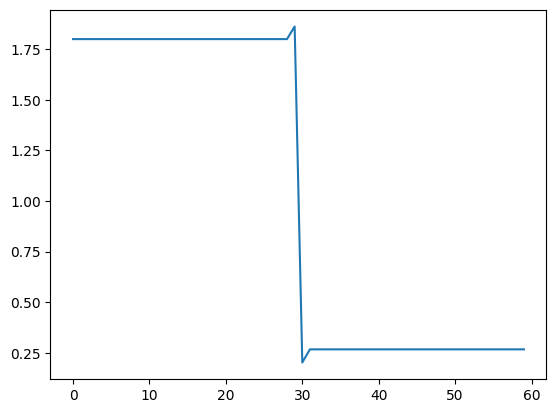

In [12]:
w_cc = compute_primitives(_hs, u_cc, gamma=gamma)
plt.plot(w_cc[_hs("P")].flatten())
w_cc[_hs("P")][-1], w_cc[_hs("P")][0]

(0.26396499238964993, 1.802600472813238)

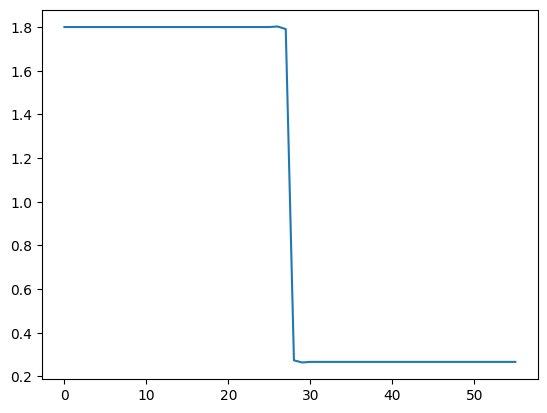

In [11]:
w_fv = interpolate_fv_averages(w_cc, p=(3, 0, 0))
plt.plot(w_fv[_hs("P")].flatten())
w_fv[_hs("P")].min(), w_fv[_hs("P")].max()